# Design Evaluations and Model Predictions for the Hill Function Model


In [1]:
%%capture
import pandas as pd
import matplotlib.pyplot as plt
from N3_sampling_and_fitting import *

Exception: Unable to find loglikelihood ratio boundary in required bounds!

### Evaluating the Optimized Design

### Asymptotic Covariance and Confidence Intervals

In [3]:
eval_options={'Method':'Asymptotic',
              'Covariance':True}
asymptotic_covariance = hill_model.evaluate(exact_design,fit_params,eval_options)
print(asymptotic_covariance)

          Covariance                              
               Basal      Rate      Hill HalfConst
Basal       0.007685 -0.008469 -0.011618  0.010248
Rate       -0.008469  0.014669  0.025006 -0.015291
Hill       -0.011618  0.025006  0.046414 -0.024923
HalfConst   0.010248 -0.015291 -0.024923  0.017466


In [23]:
asymptotic_lower_bound = fit_params - 2*np.sqrt(np.diag(asymptotic_covariance))
asymptotic_upper_bound = fit_params + 2*np.sqrt(np.diag(asymptotic_covariance))

fim_bnds_array = np.vstack((asymptotic_lower_bound,
                            fit_params,
                            asymptotic_upper_bound)).T
fim_bnds0 = pd.DataFrame(np.exp(fim_bnds_array),
                        index=['Alpha0','Alpha','n','K'],
                        columns=['Lower','Estimate','Upper'])
print('')
print(fim_bnds0)
print('')


           Lower  Estimate     Upper
Alpha0  0.953863  1.123902  1.324253
Alpha   3.444609  4.357886  5.513303
n       1.143471  1.682639  2.476035
K       0.895208  1.209573  1.634330



### Model Predictions

In [24]:
#convert the covariance matrix to numpy
covariance_matrix = asymptotic_covariance.to_numpy()
#generate predictions with error bars fdor a random selection of inputs)
prediction_inputs = pd.DataFrame({'Inducer':np.linspace(0.1,10,100),
                                  'Variable':['Response']*100})
#request prediction and observation intervals
prediction_options = {'PredictionInterval':True,
                      'ObservationInterval':True}
#generate predictions and intervals
predictions = hill_model.predict(prediction_inputs,
                                   fit_params,
                                   covariance_matrix = covariance_matrix,
                                   options=prediction_options)


### Plotting Prediction Intervals

KeyError: ('Inputs', 'Light')

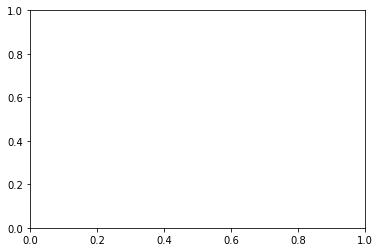

In [25]:
#create plot
fig, ax = plt.subplots()
#plot observation interval
ax.fill_between(predictions['Inputs','Light'],
                predictions['Observation','Lower'],
                predictions['Observation','Upper'],
                alpha=0.3,
                color='C1')
#plot prediction interval
ax.fill_between(predictions['Inputs','Light'],
                predictions['Prediction','Lower'],
                predictions['Prediction','Upper'],
                alpha=0.4,
                color='C0')
#plot mean model prediction
ax.plot(predictions['Inputs','Light'], predictions['Prediction','Mean'], '-')
#plot initial dataset
ax.plot(init_data['Light'], init_data['Observation'], 'o', color='C1')
ax.set_xlabel('Light')
ax.set_ylabel('GFP')
plt.show()